# ML K-Nearest Neighbours

Based on Tech with Tim's YouTube Channel

https://www.youtube.com/watch?v=45ryDIPHdGg
    
Dataset from https://archive.ics.uci.edu/ml/datasets.php    

KNN is very time consuming to model each time as it has to compute the distance between neighbouring points for each point
Difficult to save it as a model as it has to save the training data for each cluster 
Useless to train beforehand because it constantly has to keep looking at every data point before it can make a prediction

In [86]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn import metrics

In [60]:
data = pd.read_csv('car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [61]:
# Need to convert all the data into appropriate types
# Need to convert the 'vhigh', 'unacc' into integer values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Dealing with irregular data

In [62]:
# SKlearn comes with preprocessing to help to convert into appropriate integer values
# Encodes the labels into integers which can then be decoded later on
# Convert non-numerical data into numerical
# Use list instead of numpy or pandas df

le = preprocessing.LabelEncoder()

buying = le.fit_transform(list(data['buying']))
maint = le.fit_transform(list(data['maint']))
doors = le.fit_transform(list(data['doors']))
persons = le.fit_transform(list(data['persons']))
lug_boot = le.fit_transform(list(data['lug_boot']))
safety = le.fit_transform(list(data['safety']))
cls = le.fit_transform(list(data['class']))

print(buying)
print(cls)

[3 3 3 ... 1 1 1]
[2 2 2 ... 2 1 3]


# Modelling

In [63]:
predict = 'class'

In [64]:
x = list(zip(buying, maint, doors, persons, lug_boot, safety)) # features
y = list(cls) # label

In [ ]:
# K is a hyperparameter that needs to be an odd number to avoid ambiguity
# If K is too high, then it might be clustered into the wrong group

In [88]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1, random_state=1)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
acc
# print(x_train, y_test)

0.9364161849710982

In [82]:
# Finding the range of accuracies
best = 0
for _ in range(30): # Repeats up to 30 times to find the best accuracy value score
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
    model = KNeighborsClassifier(n_neighbors=9)
    
    model.fit(x_train, y_train)
    
    acc = model.score(x_test, y_test)
    print (acc)
    if acc > best:
        best = acc
print('The best value is:', best)

0.9479768786127167
0.9479768786127167
0.930635838150289
0.884393063583815
0.9132947976878613
0.953757225433526
0.9479768786127167
0.884393063583815
0.9364161849710982
0.930635838150289
0.9479768786127167
0.953757225433526
0.9421965317919075
0.8901734104046243
0.9132947976878613
0.953757225433526
0.930635838150289
0.9364161849710982
0.9421965317919075
0.9190751445086706
0.9190751445086706
0.9364161849710982
0.9364161849710982
0.9364161849710982
0.953757225433526
0.9479768786127167
0.9364161849710982
0.953757225433526
0.9364161849710982
0.9479768786127167
The best value is: 0.953757225433526


# Model Validation

In [ ]:
predicted = model.predict(x_test)

for x in range(len(x_test)):
    print('Predicted: ', predicted[x], 'Data: ', x_test[x], 'Actual: ', y_test[x])

In [55]:
names = ['unacc', 'acc', 'good', 'vgood']

for x in range(len(x_test)):
    print('Predicted: ', names[predicted[x]], 'Data: ', x_test[x], 'Actual: ', names[y_test[x]])

Predicted:  good Data:  (2, 1, 1, 2, 2, 1) Actual:  good
Predicted:  unacc Data:  (0, 0, 1, 2, 0, 2) Actual:  unacc
Predicted:  good Data:  (0, 0, 3, 0, 1, 2) Actual:  good
Predicted:  good Data:  (1, 2, 1, 0, 0, 2) Actual:  good
Predicted:  good Data:  (0, 2, 3, 0, 2, 2) Actual:  good
Predicted:  unacc Data:  (3, 2, 0, 2, 0, 2) Actual:  unacc
Predicted:  good Data:  (1, 0, 2, 1, 2, 1) Actual:  good
Predicted:  good Data:  (2, 0, 0, 1, 0, 1) Actual:  good
Predicted:  unacc Data:  (2, 1, 2, 1, 2, 2) Actual:  unacc
Predicted:  good Data:  (2, 3, 1, 0, 2, 1) Actual:  good
Predicted:  unacc Data:  (3, 1, 2, 2, 0, 2) Actual:  unacc
Predicted:  good Data:  (1, 2, 2, 1, 1, 1) Actual:  good
Predicted:  good Data:  (1, 3, 3, 0, 2, 2) Actual:  good
Predicted:  good Data:  (2, 0, 2, 0, 2, 2) Actual:  good
Predicted:  good Data:  (3, 3, 3, 1, 0, 0) Actual:  good
Predicted:  good Data:  (3, 2, 2, 0, 1, 0) Actual:  good
Predicted:  good Data:  (1, 1, 1, 2, 0, 1) Actual:  good
Predicted:  unacc Data:

In [ ]:
predicted = model.predict(x_test)

for x in range(len(x_test)):
    print('Predicted: ', predicted[x], 'Data: ', x_test[x], 'Actual: ', y_test[x])
    
    # Finds the K-neighbors of a point. Returns indices of and distances to the neighbors of each point.
    n = model.kneighbors([x_test[x]], n_neighbors = 9, return_distance = True)
    print('N: ', n)
    
# Next step is to plot these onto a graph with the indices

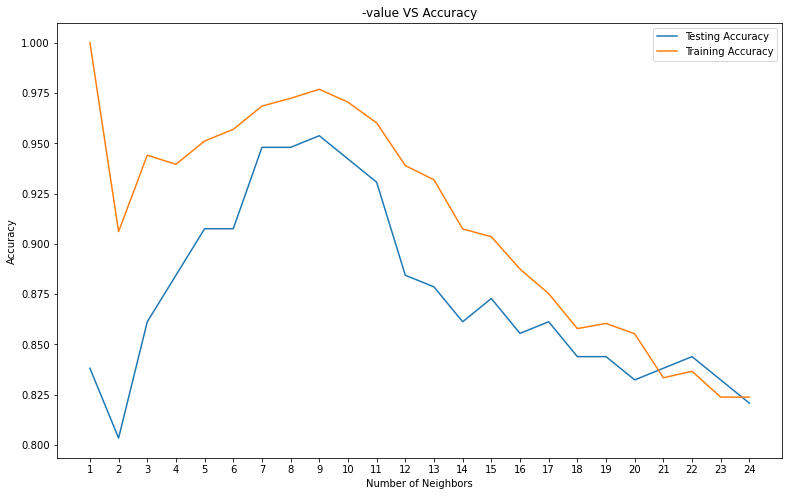

Best accuracy is 0.953757225433526 with K = 9


In [79]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))